In [12]:
import math
import random as rnd
import matplotlib.pyplot as plt

All the necessary libraries are imported to generate the required plots.

In [13]:
pi = 4.0 * math.atan2(1, 1)

we define the value of pi

In [14]:
points = int(input("Enter number of MC points per trial [500] : ") or 500)
trials = int(input("Enter number of trials [2500] : ") or 2500)
rnd.seed(int(input("Enter random number seed [ 0 => system ] : ") or 0) or None)

points is the number of points to be generated in the square per trial
trials is the number of trials to be performed
the random number seed is set to 0 by default to ensure that the same pseudo-random numbers are generated each time

In [15]:
ratio = []

ratio is a list that stores the ratios of our computed values of pi versus the actual value of pi

In [16]:
for i in range(trials):
    bounded = 0
    for j in range(points):
        bounded += (
            math.sqrt(
                math.pow(rnd.uniform(-1.0, +1.0), 2)
                + math.pow(rnd.uniform(-1.0, +1.0), 2)
            )
            <= 1
        )
    ratio.append(4.0 * bounded / points / pi)

while there are trials remaining, for each trial, we generate a random coordinate in the square and check if it is inside the circle. If it is, we increment the count of points inside the circle. We then compute the ratio of points inside the circle to the total number of points generated and append it to the ratio list.

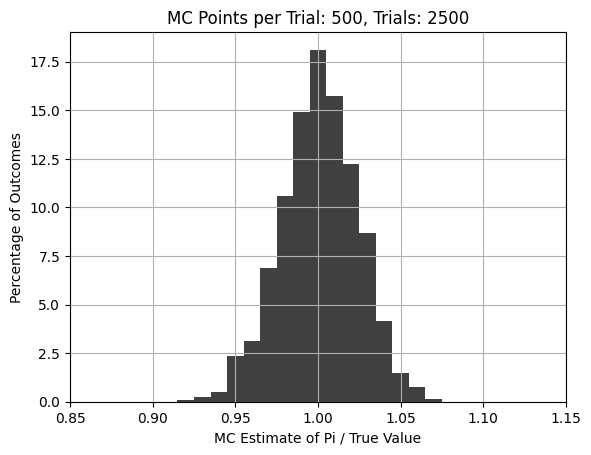

In [17]:
fig = plt.figure()
plt.hist(
    ratio,
    weights=[100.0 / trials] * (trials),
    bins=31,
    range=(0.845, 1.155),
    color="0.25",
    alpha=1.0,
)
plt.xlim(0.85, 1.15)
plt.ylim(0.0, None)
plt.title("MC Points per Trial: {}, Trials: {}".format(points, trials))
plt.xlabel("MC Estimate of Pi / True Value")
plt.ylabel("Percentage of Outcomes")
plt.grid()
plt.show()
fig.savefig("./Pi.pdf")

we generate a new histogram with the ratio list as the data and 31 bins. This will show us the distribution of the ratios of our computed values of pi versus the actual value of pi. The distribution will be centered around 1, since the ratio of points inside the circle to the total number of points generated will be close to 1 when the number of trials is large. In the title of the histogram, we display the number of trials performed, and the number of points generated per trial. The x axis of the histogram is labeled with the ratio of points inside the circle to the total number of points generated compared to the actual value of pi.
The y axis of the histogram is labeled with the percentage of trials that resulted in that ratio for each bin. We display the histogram with a grid, and save it to a file named "Pi.pdf" in the current folder.